<a href="https://colab.research.google.com/github/kjyothiswaroop/Breast-Cancer-Classification/blob/master/Breast_Cancer_Classification(Codersarts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Classification
The following notebook will be used for demonstrating classification of Breast Cancer.

Data Set: Wisconsin Cancer Data Set

Models Used : Support Vector Machine and Decision Tree Classifiers 



In [1]:
#Importing the required libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 # Understanding the Data Set
In the below code the data set is loaded and the features are explored. The data set is downloaded from Kaggle and loaded on to the notebook in the CSV format.    
  

In [0]:
cancer_df = pd.read_csv("https://raw.githubusercontent.com/kjyothiswaroop/Breast-Cancer-Classification/master/Breast_Cancer_data.csv")

In [3]:
#Obtaining the first five rows of the data set to explore the features.
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#checking for any missing values
cancer_df.info()
#No Missing values as can be seen below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 ## Answer 1.1 : 

 From the above table we see that there are 10 parameters:
        
        radius,texture,perimeter,area,smoothness,compactness,concavity,  concavepoints,symmetry and fractal_dimension.

        Also we further have 3 variations among these paramteres i.e.:
        mean , standard error and maximum.
        Below I will be briefly explaining each of the following parameters.
        We all know that Cancer is a collection of cells speaking in depth the nuclei.
        Radius: It is the average of the distances of all the points on the surface of the nucleus from the center of the nucleus.
        Perimeter: The length of the line bounding the nucleus.
        Area : The area bound by the nucleus
        Compactness : This is given by (perimeter)**2/area. This quantity helps in determining the irregularity in the nucleus shape but maybe biased towards elongated and small cells(which might not malignant)
        Smoothness: This is measured by taking differences between the line joining the center to the point on the perimeter and the average of the surrounding lines. The lesser the difference the more the smoothness.
        Texture : This parameter is related to the image characteristics. It is measured by finding the variance of gray scale intensities of each pixel.

        Concavity: This is similar to the concave curves in Mathematics. A line is drawn between two points of the perimeter and the amount of line lying outside the curve determines the concavity and thus the irregularity in shape.

        Concavepoints: The number of concave points
        
        Symmetry: The longest chord passing through the centre is found and perpendiculars are drawn to this. The difference in length of the Longest chord and the perpendiculars is the measure of symmetry at each point.
        
        FractalDimension: This is also another measure where we try and fit polygons in the nucleus and log of the amount of deviation is measured. With the increase in Fractaldimension the cell is more irregular thus concluding Malignancy.
   
   Explanation for choosing mean, standard error , maximum:

    There are various number of cells in a tumor. Taking the mean of the parameters of the cells will be easier rather than to calculate with each cell.
    The Standard error is the amount of deviation fromm the mean. This will help see the amount of irregularity.
    The Maximum will help us understand whether the mean is closer to the maximum or away from it thus will help determine if that person is more likely to have a malignant tumour or a benign tumor.
    



In [5]:
#Let us the drop the ID column as it will not be of any use in our analysis
cancer_df = cancer_df.drop(["id"],1)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#Let us divide the features in the 3 categories mean,standard error and the maximum
features_mean = list(cancer_df.columns[1:11])
features_se = list(cancer_df.columns[11:21])
features_max = list(cancer_df.columns[21:])

In [0]:
#Binary Encoding the Diagnosis
cancer_df['diagnosis'] = np.where(cancer_df['diagnosis']=="M",1,0)

In [8]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#Now we have to plot histograms for the two classes malignant(denoted as 'm') and benign(denoted as 'b') we shall splt the dta frame accordingly
m = cancer_df[cancer_df["diagnosis"]== 1]
b = cancer_df[cancer_df["diagnosis"]== 0]

 ## Answer 1.2 :

  Plotting the Histograms :
       
       The first cell below corresponds to the histograms of the mean characteristics.
       The next cell corresponds to the histograms of the standard error characteristics.
       The final cell corresponds to the histograms of the maximum characteristics.

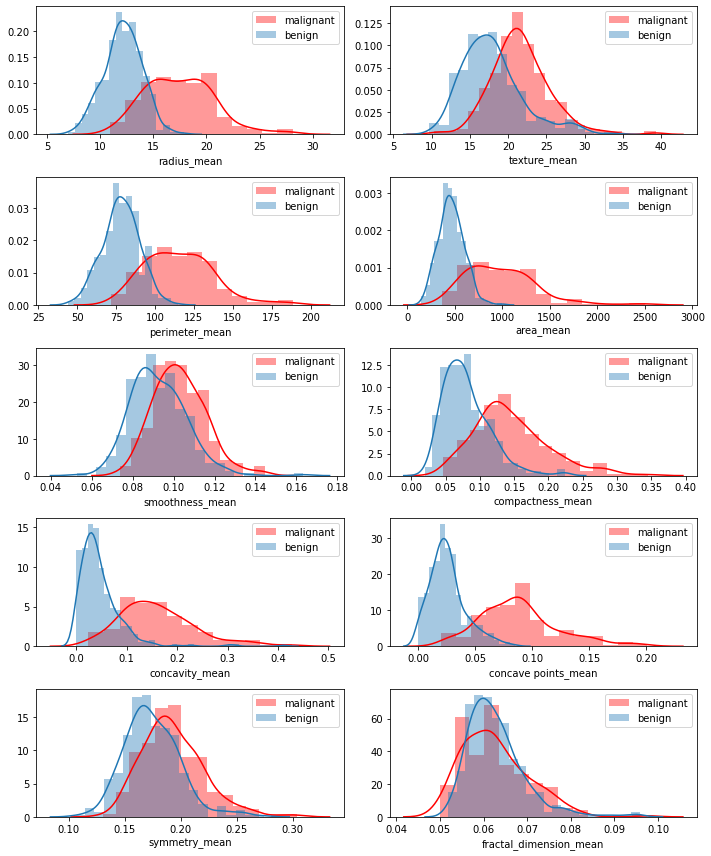

In [10]:
#Mean Characteristics
fig, ax = plt.subplots(5, 2, figsize=(10,12))
axes = ax.ravel()
for i, feature in enumerate(features_mean):
    sns.distplot(m[feature], label="malignant", ax=axes[i], color='r')
    sns.distplot(b[feature], label="benign", ax=axes[i])
    axes[i].legend()
plt.tight_layout()

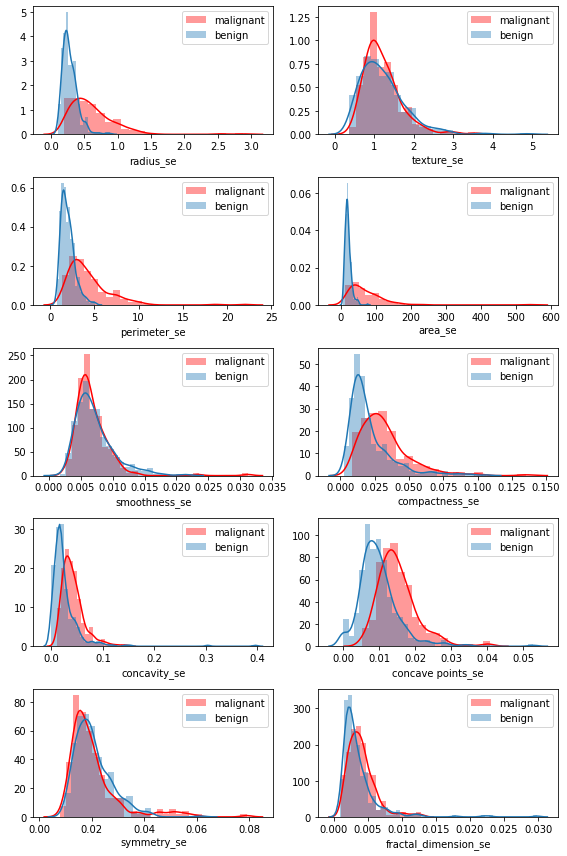

In [11]:
#Standord Error Characteristics
fig, ax = plt.subplots(5, 2, figsize=(8,12))
axes = ax.ravel()
for i, feature in enumerate(features_se):
    sns.distplot(m[feature], label="malignant", ax=axes[i], color='r')
    sns.distplot(b[feature], label="benign", ax=axes[i])
    axes[i].legend()
plt.tight_layout()

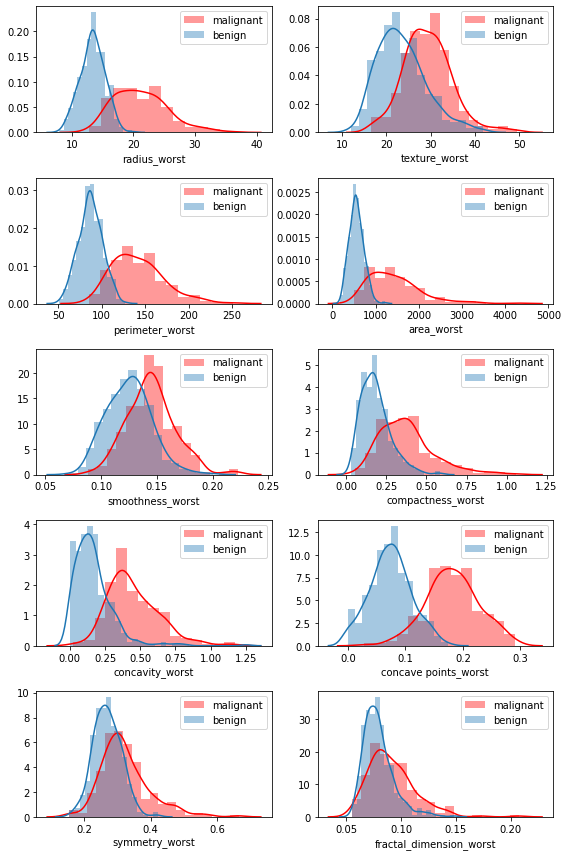

In [12]:
#Maximum Characteristics
fig, ax = plt.subplots(5, 2, figsize=(8,12))
axes = ax.ravel()
for i, feature in enumerate(features_max):
    sns.distplot(m[feature], label="malignant", ax=axes[i], color='r')
    sns.distplot(b[feature], label="benign", ax=axes[i])
    axes[i].legend()
plt.tight_layout()

## Answer 1.3 :

 Plotting the ROC curves:
  
      The first cell below corresponds to the ROCs of the mean characteristics.
      The next cell corresponds to the ROCs of the standard error characteristics.
      The final cell corresponds to the ROCs of the maximum characteristics.
      
  We know that ROC curve will be plotted for a model and thus below i will be doing the following :

     1) I will train a Random Forest Classifier for each feature.

     2) Then I would plot the ROC curve for each feature.



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X = cancer_df.drop(['diagnosis'],1)
y = cancer_df['diagnosis']

In [0]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [0]:
#Randomforest Classifier
rf = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=111)

In [0]:
from sklearn.metrics import plot_roc_curve

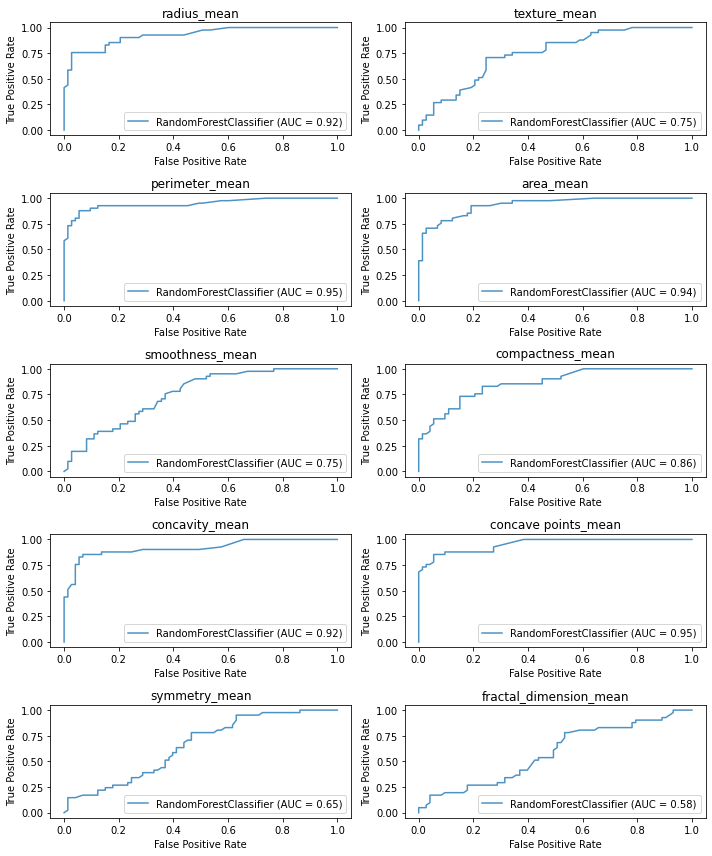

In [18]:
#Plotting the ROC curves for features_mean
fig, ax = plt.subplots(5, 2, figsize=(10,12))
axes = ax.ravel()
for i, feature in enumerate(features_mean):
    rf.fit(X_train[feature].values.reshape(-1,1),y_train)
    rf_disp=plot_roc_curve(rf,X_test[feature].values.reshape(-1,1),y_test,ax=axes[i],alpha=0.8)
    axes[i].legend()
    axes[i].set_title(features_mean[i])
plt.tight_layout()

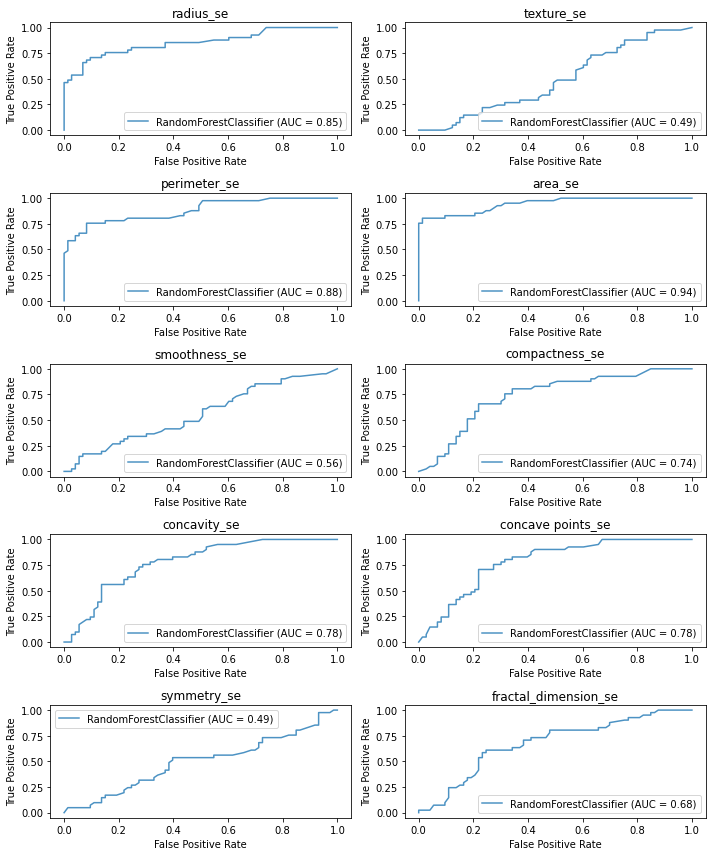

In [19]:
#Plotting the ROC curves for features_se
fig, ax = plt.subplots(5, 2, figsize=(10,12))
axes = ax.ravel()
for i, feature in enumerate(features_se):
    rf.fit(X_train[feature].values.reshape(-1,1),y_train)
    rf_disp=plot_roc_curve(rf,X_test[feature].values.reshape(-1,1),y_test,ax=axes[i],alpha=0.8)
    axes[i].legend()
    axes[i].set_title(features_se[i])
plt.tight_layout()

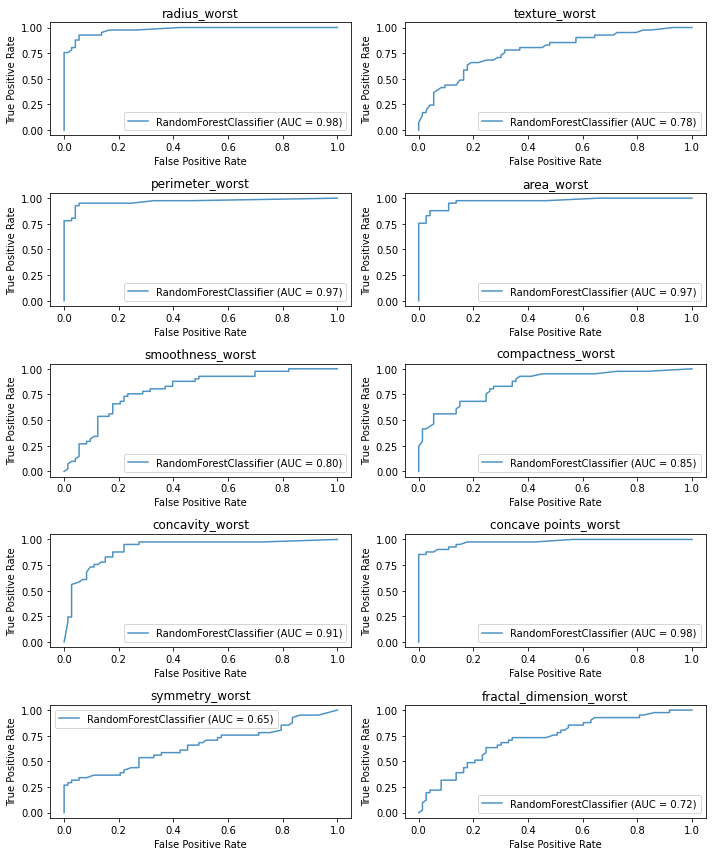

In [20]:
#Plotting the ROC curves for features_max
fig, ax = plt.subplots(5, 2, figsize=(10,12))
axes = ax.ravel()
for i, feature in enumerate(features_max):
    rf.fit(X_train[feature].values.reshape(-1,1),y_train)
    rf_disp=plot_roc_curve(rf,X_test[feature].values.reshape(-1,1),y_test,ax=axes[i],alpha=0.8)
    axes[i].legend()
    axes[i].set_title(features_max[i])
plt.tight_layout()

## Answer 1.4 :

 Now We must analyse based on the Histograms and ROC.
     The things to be considered are that the histogram for a particular feature must not be too skewed and the ROC curve must provide a decent accuracy. Too high value of an accuracy might also lead to overfit of the model.

  Based on the above the features would be:
    
     1) texture_mean 
     2) smoothness_worst
     3) perimeter_worst
     4) perimeter_mean
     5) compactness_worst
  The Above parameters were selected on the basis of a good AUC-ROC value and also considering the skewness of the distributions. The ideal ones are the ones with very little skewness in the distribution and a good roc score.

##Answer 1.5 :

 In the below code block I will be calculating the "Analysis point"
  
     Analysis Point is the mean of means of the features of the two classes.

In [21]:
#Calculating respective means in the two classes
m_mean = m.mean(axis=0)
b_mean = b.mean(axis=0)
m_mean

diagnosis                     1.000000
radius_mean                  17.462830
texture_mean                 21.604906
perimeter_mean              115.365377
area_mean                   978.376415
smoothness_mean               0.102898
compactness_mean              0.145188
concavity_mean                0.160775
concave points_mean           0.087990
symmetry_mean                 0.192909
fractal_dimension_mean        0.062680
radius_se                     0.609083
texture_se                    1.210915
perimeter_se                  4.323929
area_se                      72.672406
smoothness_se                 0.006780
compactness_se                0.032281
concavity_se                  0.041824
concave points_se             0.015060
symmetry_se                   0.020472
fractal_dimension_se          0.004062
radius_worst                 21.134811
texture_worst                29.318208
perimeter_worst             141.370330
area_worst                 1422.286321
smoothness_worst         

In [22]:
b_mean

diagnosis                    0.000000
radius_mean                 12.146524
texture_mean                17.914762
perimeter_mean              78.075406
area_mean                  462.790196
smoothness_mean              0.092478
compactness_mean             0.080085
concavity_mean               0.046058
concave points_mean          0.025717
symmetry_mean                0.174186
fractal_dimension_mean       0.062867
radius_se                    0.284082
texture_se                   1.220380
perimeter_se                 2.000321
area_se                     21.135148
smoothness_se                0.007196
compactness_se               0.021438
concavity_se                 0.025997
concave points_se            0.009858
symmetry_se                  0.020584
fractal_dimension_se         0.003636
radius_worst                13.379801
texture_worst               23.515070
perimeter_worst             87.005938
area_worst                 558.899440
smoothness_worst             0.124959
compactness_

In [23]:
analysis_point = (m_mean+b_mean)/2
analysis_point

diagnosis                    0.500000
radius_mean                 14.804677
texture_mean                19.759834
perimeter_mean              96.720392
area_mean                  720.583306
smoothness_mean              0.097688
compactness_mean             0.112636
concavity_mean               0.103416
concave points_mean          0.056854
symmetry_mean                0.183547
fractal_dimension_mean       0.062774
radius_se                    0.446582
texture_se                   1.215647
perimeter_se                 3.162125
area_se                     46.903777
smoothness_se                0.006988
compactness_se               0.026860
concavity_se                 0.033910
concave points_se            0.012459
symmetry_se                  0.020528
fractal_dimension_se         0.003849
radius_worst                17.257306
texture_worst               26.416639
perimeter_worst            114.188134
area_worst                 990.592880
smoothness_worst             0.134902
compactness_

#  Train a Decision Tree Classifier
  In the below section a Decision Tree Model would be trained 

In [0]:
#import the Model
from sklearn.tree import DecisionTreeClassifier

##Answer 2.1 :

  The below cell creates the model. I would keep all the other parameters of the Decision Tree same as the most significant features in a Decision Tree are the depth of the tree and the number of leaf nodes as the number of leaf nodes help in smoothening the model.

Additionally there is one feature I would include in the GridSearchCV that is the max_features, it helps us to decide how many features to use for the spilting which is definitely important beacause then instead of using all the features we could just use the important features for the decision making.

In [0]:
#Creating the model
dt_clf = DecisionTreeClassifier(criterion='gini',random_state=0)

##Answer 2.2 :

  One of the best feature about the Tree Based models is that they are ***Independent of the scale of the features.***

And thus there is no need to perform any Feature Scaling here.

##Answer 2.3 :

 In the below cell the GridSearch CV is performed for not two but three features and they are :

Max_depth, min_samples_leaf, max_features

The ranges for the following variables would be as follows:
 
  min_samples_leaf : 1-20 
    
 https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680#:~:text=The%20paper%2C%20An%20empirical%20study%20on%20hyperparameter%20tuning%20of%20decision,20%20for%20the%20CART%20algorithm. 
     
According to this article studies show that the optimal value of min_samples_leaf always lies between 1-20 for a CART model.

max_depth : *Genreally , if the tree is too deep then we face overfitting and we will need to prune it and if it is too shallow then there is underfitting*. 
Theoritically, it can be one less than the number of training samples. But this would lead to an overfit.
Also like the min_samples_leaf there is no fit solution for this paramter so must see the training and test accuracies and decide based on them.

As observed elsewhere many others working on this Data set preferred a range of **1-30**.
max_features : This paramter has the range of the number of features but i would prefer to give a distinct number of features so the range can be kept from **1-11**.

In [0]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_search = GridSearchCV(estimator = dt_clf,param_grid={'max_depth': list(range(1,30)),
                  'max_features': list(range(1,11)),'min_samples_leaf': list(range(1,20))},cv=10,n_jobs=10,verbose=True)
grid_search.fit(X_train,y_train)
print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))


Fitting 10 folds for each of 5510 candidates, totalling 55100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 900 tasks      | elapsed:   11.3s
[Parallel(n_jobs=10)]: Done 2300 tasks      | elapsed:   17.6s
[Parallel(n_jobs=10)]: Done 4100 tasks      | elapsed:   25.8s
[Parallel(n_jobs=10)]: Done 6300 tasks      | elapsed:   36.1s
[Parallel(n_jobs=10)]: Done 8900 tasks      | elapsed:   48.7s
[Parallel(n_jobs=10)]: Done 11900 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 15300 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 19100 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 23300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 27900 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 32900 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 38300 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 44100 tas

Best Score: 0.9603864734299516
Best params: {'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 2}


[Parallel(n_jobs=10)]: Done 55100 out of 55100 | elapsed:  4.6min finished


 ## Model Accuracy and Hyperparameters for the Decision Tree model
Thus the best Accuracy obtained for the Decision Tree Classifier is:

**Training Accuracy = 0.9604 or 96.04 %**

**With max_depth = 7 , max_features = 9 , min_samples_leaf = 2**

The **Test Accuracy for the Decision Tree Classifier is: 0.9474 or 94.74 %** as seen below.

In [0]:
#Assigning the above optimised model to tree_model
tree_model = grid_search.best_estimator_


In [29]:
#Making Predictions on the test data and determing the accuracies
print(accuracy_score(y_test,tree_model.predict(X_test)))


0.9473684210526315


#Evaluate the decision tree classifier  
   In the following section various measures would be used to evaluate the Decision Tree Model created in the previous section



 ## Answer 3.1 :
   In the following section The confusion matrix,precision and recall of the model will be determined. Also the Advantages and Disadvantages of the model would be discussed

In [0]:
y_predict = tree_model.predict(X_test)
from sklearn.metrics import classification_report

In [31]:
print(confusion_matrix(y_test,y_predict))
print('******************************************************')
print(classification_report(y_test,y_predict))

[[71  2]
 [ 4 37]]
******************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.95      0.90      0.92        41

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**3.1) Answer Continued:**
    
  Based on the above metrics the chance of not detecting a cancer = 1-precision.
  And Thus the **chance of not detecting a cancer is 0.05 i.e. 5 %**.

  Advantages of a Decision Tree Model:

    1)Handles both numeric data and categorical features
    2)Computationally Efficient
    3)Independent of the scale of features.
    4)Parametric model
  Disadvantages of Decision Tree:
    
    1)Small changes in data also affect the model largely.
    2)Training time is usually a bit high.
    3)Probablity to Overfit is high.
Below Additionaly I had plotted the ROC Curve for the model. 

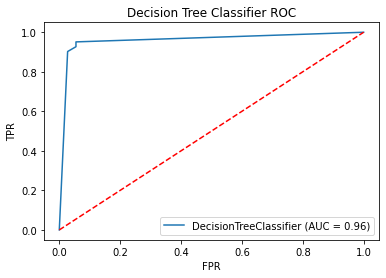

In [32]:
##Plotting the ROC Curve for the Decision Tree model:
ax=plt.gca()
tree_model_disp = plot_roc_curve(tree_model,X_test,y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

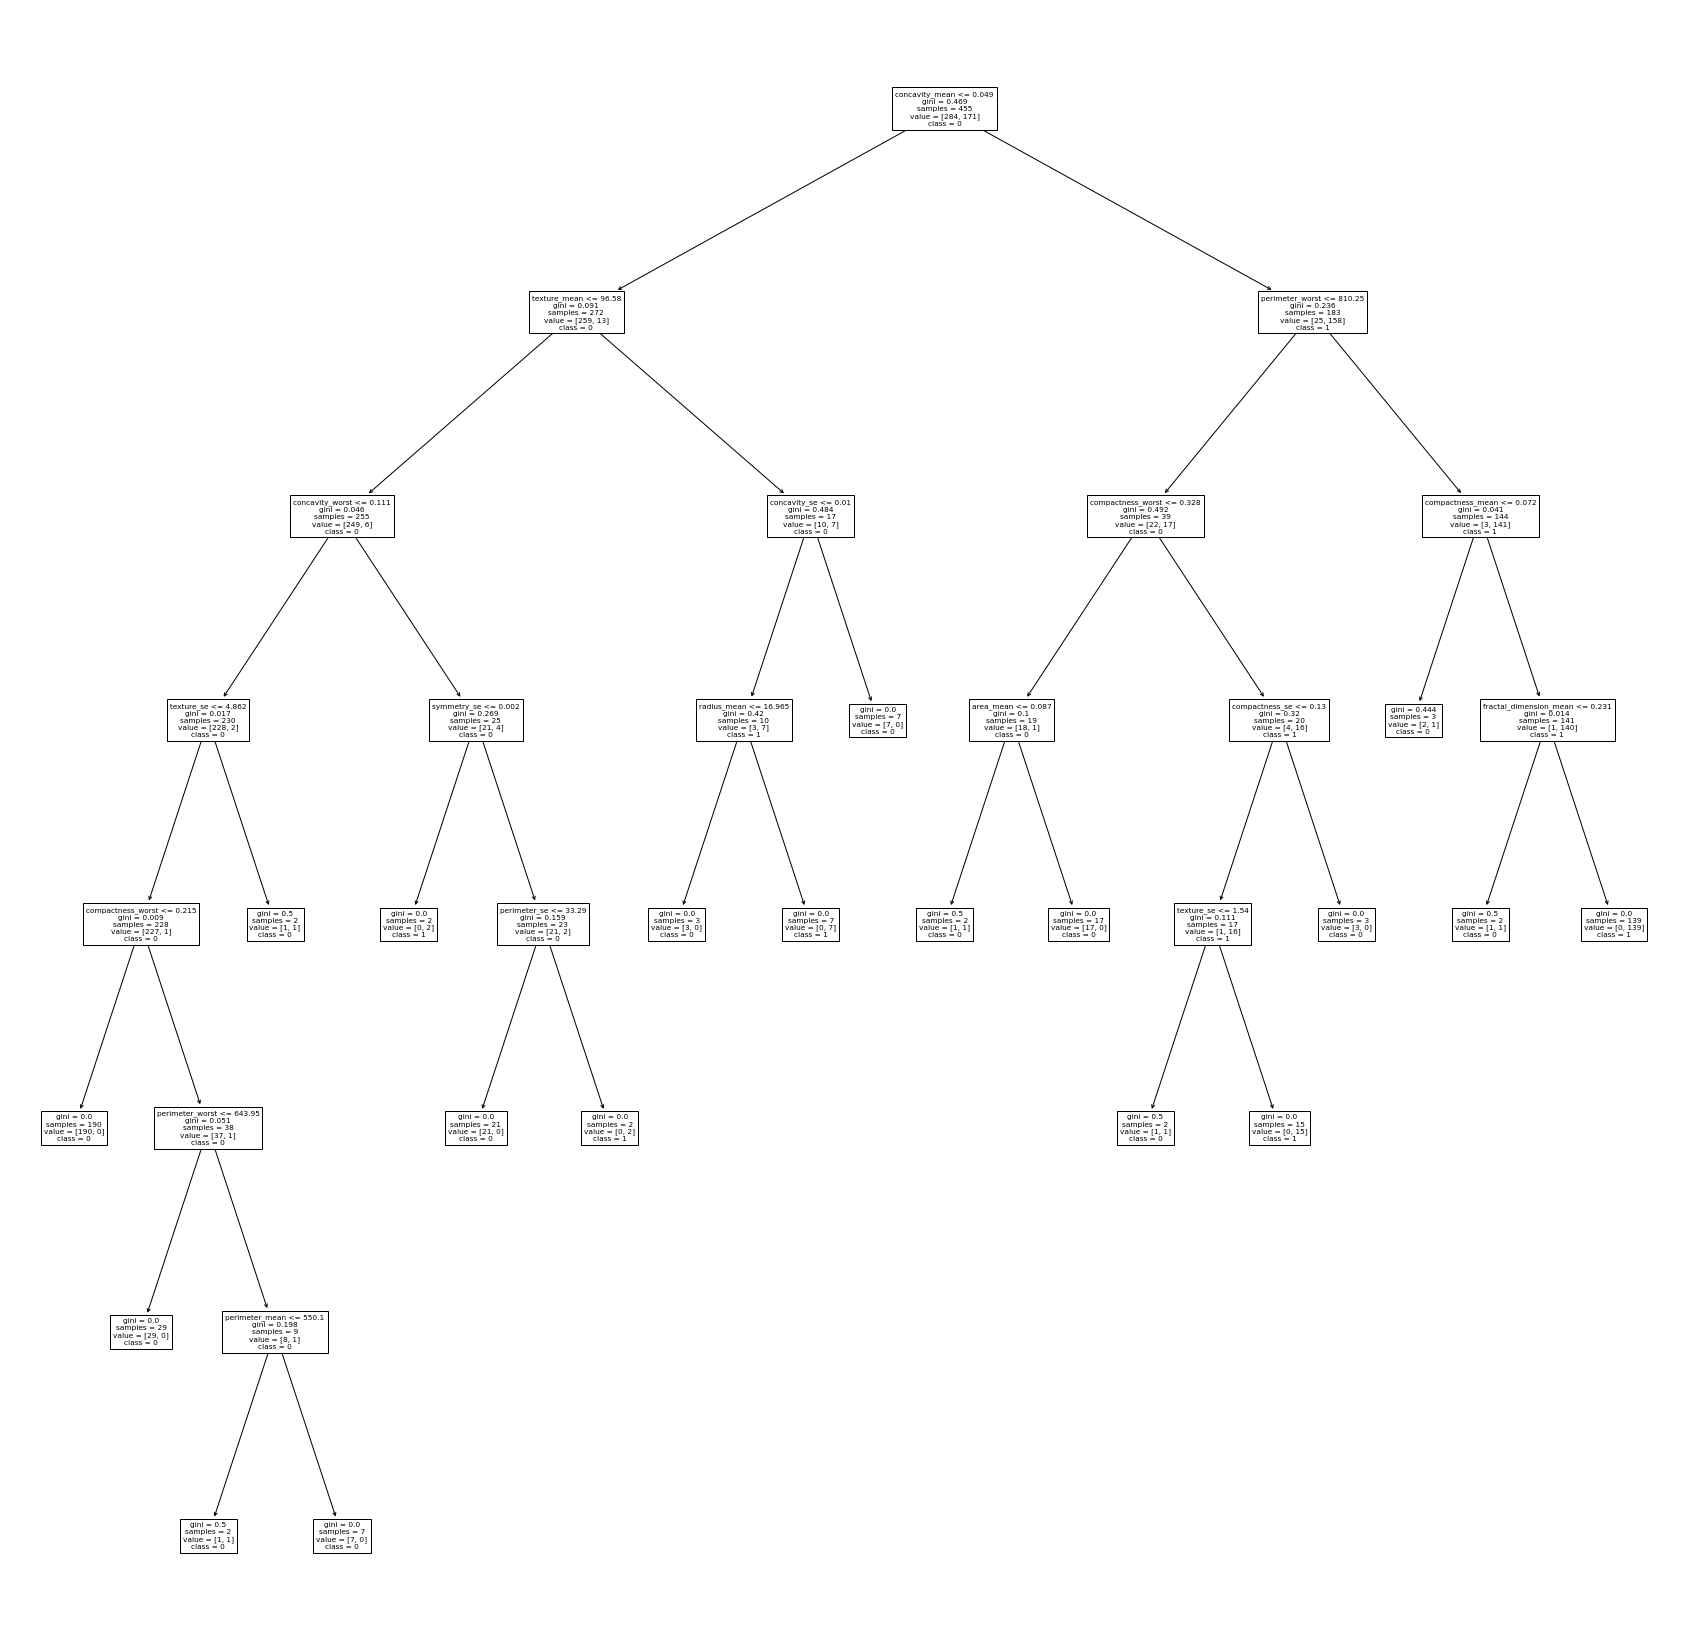

In [33]:
#Plotting the decision tree using plot_tree()
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
ax=plt.gca()
tree_diag_disp = plot_tree(tree_model,7,feature_names=list(cancer_df.columns.values),class_names= ['0','1'],ax=ax)


## Answer 3.2
  In the above cell the Tree diagram is drawn using the plot_tree().

  The entries in the node describe:
     
     gini index : The value of entropy for that particular cell
     feature_name: This that feature using which we obtain the minimum entropy for that node
     samples: This is the number of samples being used at that node to split the data.
     class : The samples at that particular node are being classified whether they belong to that class or not.
     values: Contains the number of samples split to the left and right node respectively.

     Also regarding the features being used 4 of the 5 features that i had predicted are the correct candidate features in the Decision Tree. 

# 4) Train a Support Vector Classifier with RBF Kernel.
  In the following section we would be training a SVC model for the same Breast Cancer Classification Data set


## Answer 4.1
   In this section the model is constructed and the hyperparameters are discussed.

  **max_iterations** : This is number of iterations for which we want to run the classifier. I will leave this as a default one because here there is no such condition that larger number of iters will give us more accuracy. Also if we have very less amounts of Iterations we may not reach the convergence point at all and that will hamper the accuracy.

  **tol**: This sets the tolerance limit at which we can stop further searching. I will be leaving this also as a default as in many cases in a SVM we take the tolerance value till 1e-3 which is the default value.

 **class_weights**: Class_weights if initialsed will created a weighted SVM and here also i would leave the default value which is the weight '1' for all the parameters. Reason for this is that here in a SVM with RBF kernel the data is transformed into some higher dimensional space where the importances arent determined.

In [0]:
from sklearn.svm import SVC

## Answer 4.2
   In a SVM , generally performing scaling is a good choice. This is because for the various kernels being used if the feature scaled are different then the parameter of the kernels might get biased. Thus we apply the MinMaxScaler for our data.

In [0]:
scaler = MinMaxScaler(feature_range=(0,1),copy=False)
X_new = scaler.fit_transform(X)

In [0]:
y_new = cancer_df['diagnosis']

In [0]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,test_size=0.2,random_state=111)

In [0]:
# Creating the SVM model
svc_clf = SVC(kernel='rbf',random_state=111)


## Answer 4.3
   In the below cell the GridSearch CV is performed for the parameters for C and Gamma.
   The ranges for the parameters are:
    
      C: np.logspace(-5,15,2)
      gamma: np.logspace(-15,3,2)

According to the following paper in a SVM with a RBF kernel the above paramters are optimal:
       https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

In [39]:
grid_search_svm = GridSearchCV(svc_clf,param_grid={'C': np.logspace(-5, 15, base=2,num=50),'gamma': np.logspace(-15,3,base=2,num=50)},cv=5,verbose=True,n_jobs=5)
grid_search_svm.fit(X_new_train,y_new_train)
print("Best Score: {}".format(grid_search_svm.best_score_))
print("Best params: {}".format(grid_search_svm.best_params_))

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1350 tasks      | elapsed:   11.1s
[Parallel(n_jobs=5)]: Done 3350 tasks      | elapsed:   25.4s
[Parallel(n_jobs=5)]: Done 6150 tasks      | elapsed:   42.4s
[Parallel(n_jobs=5)]: Done 9750 tasks      | elapsed:  1.0min


Best Score: 0.9846153846153847
Best params: {'C': 6.7510038459584045, 'gamma': 0.4860523707144651}


[Parallel(n_jobs=5)]: Done 12500 out of 12500 | elapsed:  1.2min finished


In [0]:
svm_model = grid_search_svm.best_estimator_

In [41]:
y_new_predict = svm_model.predict(X_new_test)
print(accuracy_score(y_new_test,y_new_predict))

0.9824561403508771


## Model Accuracies and Hyperparamters for Support Vector Classifier
   The **Train Accuracy** is : **0.9846 or 98.46%**

   The Hyperparamters:
     
     C: 6.75  gamma : 0.486
    
  The **Test Accuracy** is : **0.9825 or 98.25%**

#5)Evaluate The Support Vector Classifier

## Answer 5.1
   In the following section various metrics like confusion_matrix ,accuracies and recall values will be obtained for the SVC model.

   Advantages of the Support Vector Classifier:

     1) SVC works well for Higher Dimensional Spaces
     2) SVC is generally memory efficient
   Disadvantages of the Support Vector Classifier:

     1)SVC doesnt work well for large data sets.
     2)SVC underperforms in the cases where there is overlap between the target classes
     3)SVC has no probablistic explanation.
    
From the below metrics the chance of not detecting a cancer is:

     For a Benign tumor : 0.01 or 1%

     For a Malignant tumor : 0.02 or 2%

In [42]:
# Metrics of the SVC
print(confusion_matrix(y_new_test,y_new_predict))
print('******************************************************')
print(classification_report(y_new_test,y_new_predict))

[[69  1]
 [ 1 43]]
******************************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



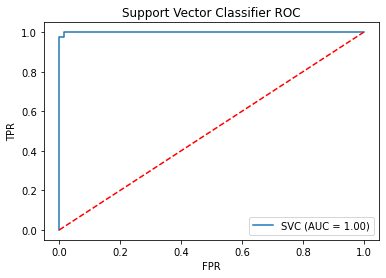

In [43]:
#plotting the ROC Curve
ax=plt.gca()
svm_model_disp = plot_roc_curve(svm_model,X_new_test,y_new_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Support Vector Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

## Answer 5.3
   Support Vectors:

   Support Vectors are the two lines around the decision boundary which ensure between the decision boundary and the support vectors there is no data point. By this we can say that the Decision Boundaries pass through the extreme data points of the respective points.

#6) Comparing the models

## Answer 6.2
 The Metrics for both the models is as follows:
  
  Decision Tree Model:
    
    Training Accuracy : 96.04%
    Test Accuracy     : 94.74%
  Support Vector Classifier:
    
    Training Accuracy : 98.46%
    Test Accuracy     : 98.25%

In Both the Above models the difference between the Train and test accuracies is not very much and thus the Models **do not** exhibit any signs of **Overfitting.**